In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import timesynth as ts

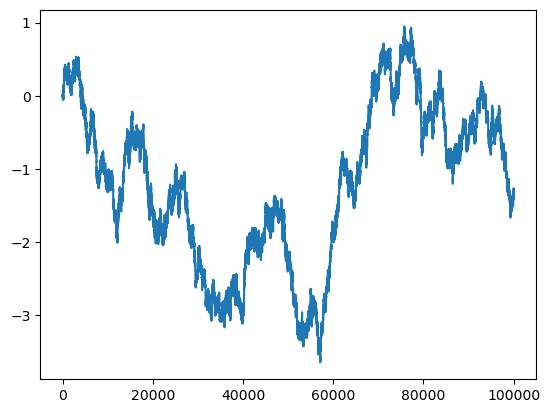

In [1]:
import numpy as np
import pandas as pd
from numpy import sqrt
import matplotlib.pyplot as plt

vol = .030
lag = 300
df = pd.DataFrame(np.random.randn(100000) * sqrt(vol) * sqrt(1 / 252.)).cumsum()
plt.plot(df[0].tolist())
plt.show()

In [16]:
irregular_time_samples = ts.TimeSampler(stop_time=20).sample_irregular_time(num_points=500, keep_percentage=50)

In [5]:
sinusoid = ts.signals.Sinusoidal(frequency=.25)

In [7]:
white_noise = ts.noise.GaussianNoise(std=.3)

In [17]:
time_series = ts.TimeSeries(signal_generator=sinusoid, noise_generator=white_noise)

In [18]:
samples, signals, errors = time_series.sample(irregular_time_samples)

In [20]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time') #name of variable plotted on X-axis
plt.ylabel('Magnitude') #name of variable on Y-axis
plt.title('Irregularly sampled sinusoid with noise'); #title of the plot

NameError: name 'plt' is not defined

In [9]:
red_noise = ts.noise.RedNoise(std=.5, tau=.8)

In [14]:
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [19]:
samples, signals, errors = timeseries_corr.sample(irregular_time_samples)

In [ ]:
plt.plot(irregular_time_samples, samples, marker='o')
plt.xlabel('Time') #X-axis label
plt.ylabel('Magnitude') #Y-axis label
plt.title('Irregularly sampled sinusoid with red noise') #title of the plot 

In [ ]:
time_sampler_pp = ts.TimeSampler(stop_time=20) 

In [ ]:
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50) 

In [ ]:
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [ ]:
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [ ]:
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

In [ ]:
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time') #X-axis label
plt.ylabel('Magnitude') #Y-axis label
plt.title('Pseudoperiodic signal'); #title of the plot 

In [ ]:
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)

In [ ]:
gp_series = ts.TimeSeries(signal_generator=gp)

In [ ]:
samples = gp_series.sample(irregular_time_samples)[0]

In [ ]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')  #X-axis label
plt.ylabel('Value')  #Y-axis label
plt.title('Gaussian Process signal with Matern 3/2-kernel');#title of plot 